THIS NOTEBOOK IS WRITTEN IN R. ADJUST KERNELS ACCORDINGLY.

# Association Rule Mining on Articles Mentioning Rent

In [2]:
library(arules)
library(arulesViz)
library(dplyr)
library(ggraph)

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write



Attaching package: ‘dplyr’


The following objects are masked from ‘package:arules’:

    intersect, recode, setdiff, setequal, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



In [3]:
getwd()

[1] "/Users/diol5851/Documents/rental-housing-cost/notebooks/unsupervised_models"

In [4]:
articles = read.transactions('../../data/rent_articles.csv', sep = ',', format = 'basket')

Warning message in asMethod(object):
“removing duplicated items in transactions”


In [15]:
assoc_rules = arules::apriori(
    articles,
    parameter = list(support = 0.042, confidence = 0.25, minlen = 2)
)
DATAFRAME(sort(assoc_rules, by = 'confidence', decreasing = TRUE), separate = FALSE) %>% select(-c(coverage)) %>% head(15) %>% print()

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
       0.25    0.1    1 none FALSE            TRUE       5   0.042      2
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 3 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[1366 item(s), 92 transaction(s)] done [0.00s].
sorting and recoding items ... [111 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [40 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
                           rule    support confidence      lift count
1         {property} => {taxes} 0.04347826  1.0000000 23.000000     4
2         {taxes} => {property} 0.04347826  1.0000000 23.000000     4
3   {medicaid} => {republicans} 0.04347826  1.0000000 23.000000     4
4   {repub

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_label()`).”


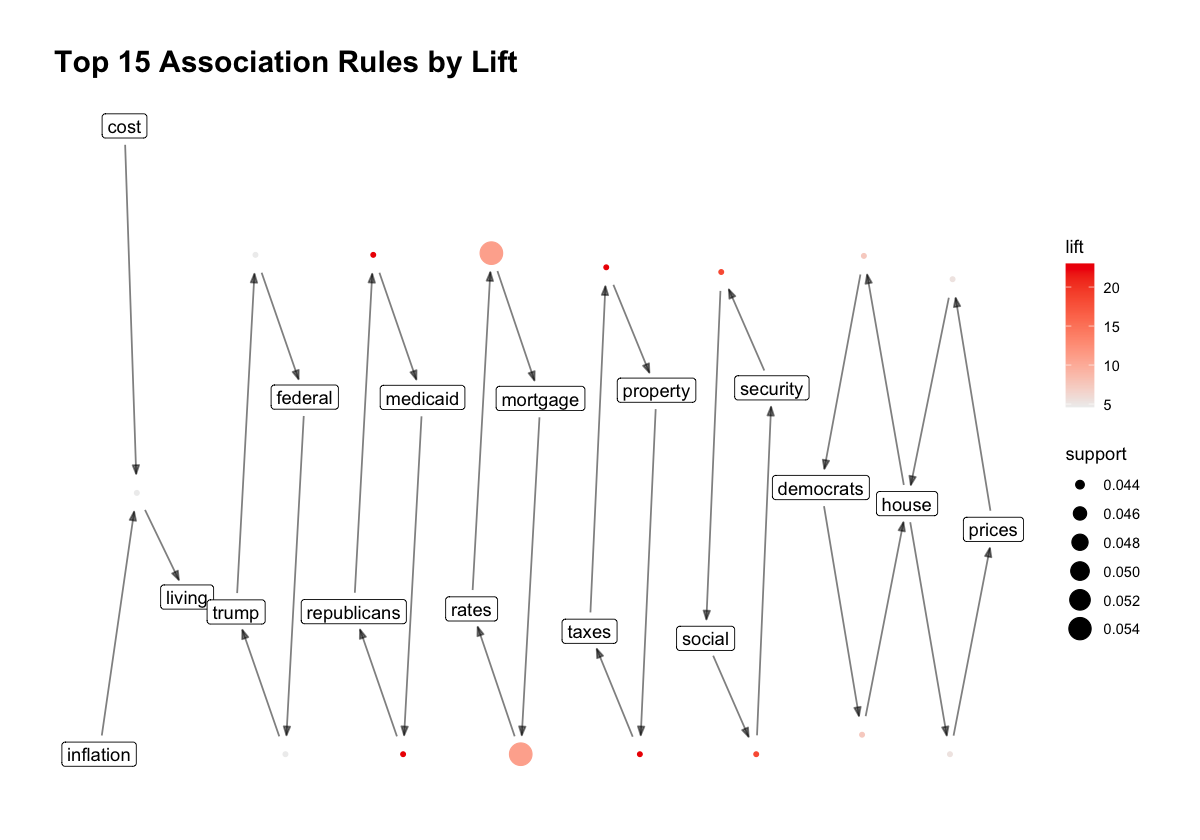

In [ ]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(
    sort(assoc_rules, by = 'lift', decreasing = TRUE) %>% head(15),
    method = 'graph',
    control = list(
        edges = ggraph::geom_edge_link(
            end_cap = circle(4, 'mm'),
            start_cap = circle(4, 'mm'),
            color = 'black',
            arrow = arrow(length = unit(2, 'mm'), angle = 20, type = 'closed'),
            alpha = 0.5
        ),
        nodetext = ggraph::geom_node_label(aes(label = label), repel = FALSE)
    )
) + ggtitle('Top 15 Association Rules by Lift')

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_label()`).”


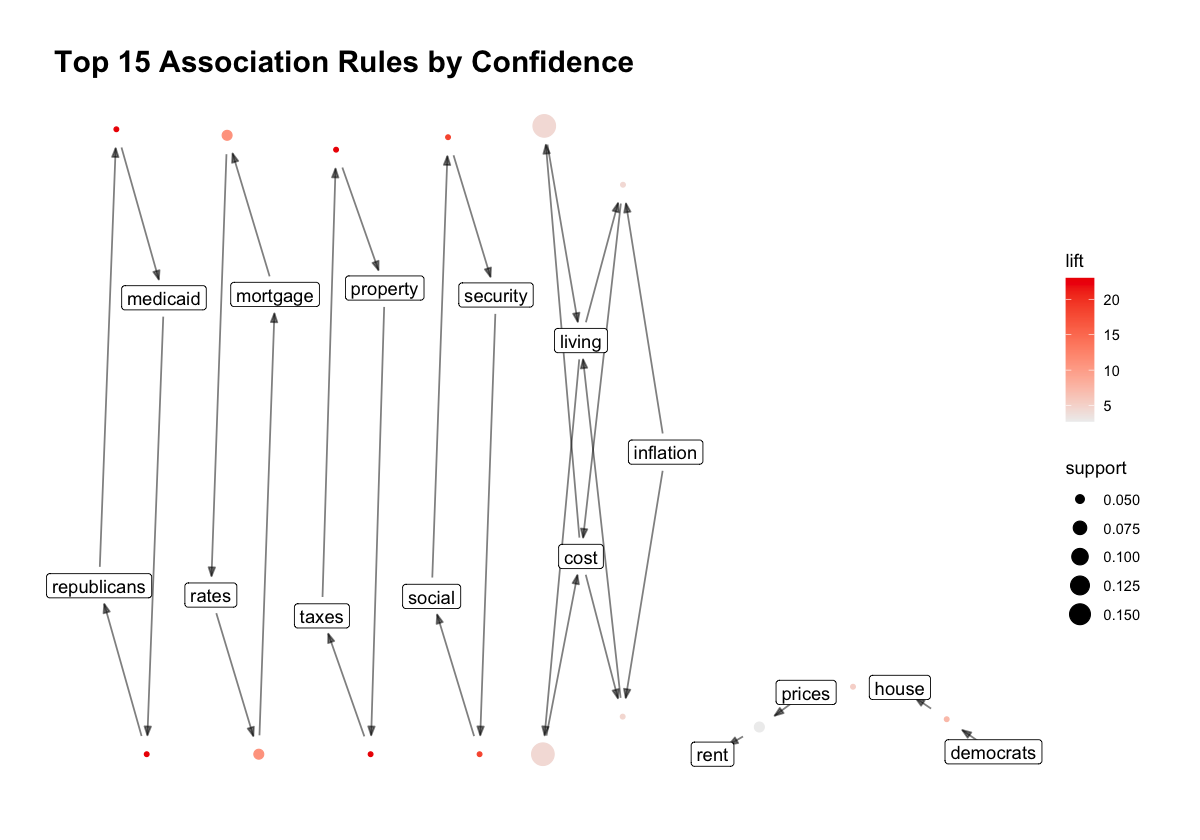

In [14]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(
    sort(assoc_rules, by = 'confidence', decreasing = TRUE) %>% head(15),
    method = 'graph',
    control = list(
        edges = ggraph::geom_edge_link(
            end_cap = circle(4, 'mm'),
            start_cap = circle(4, 'mm'),
            color = 'black',
            arrow = arrow(length = unit(2, 'mm'), angle = 20, type = 'closed'),
            alpha = 0.5
        ),
        nodetext = ggraph::geom_node_label(aes(label = label), repel = FALSE)
    )
) + ggtitle('Top 15 Association Rules by Confidence')

Warning message:
“Removed 15 rows containing missing values or values outside the scale range
(`geom_label()`).”


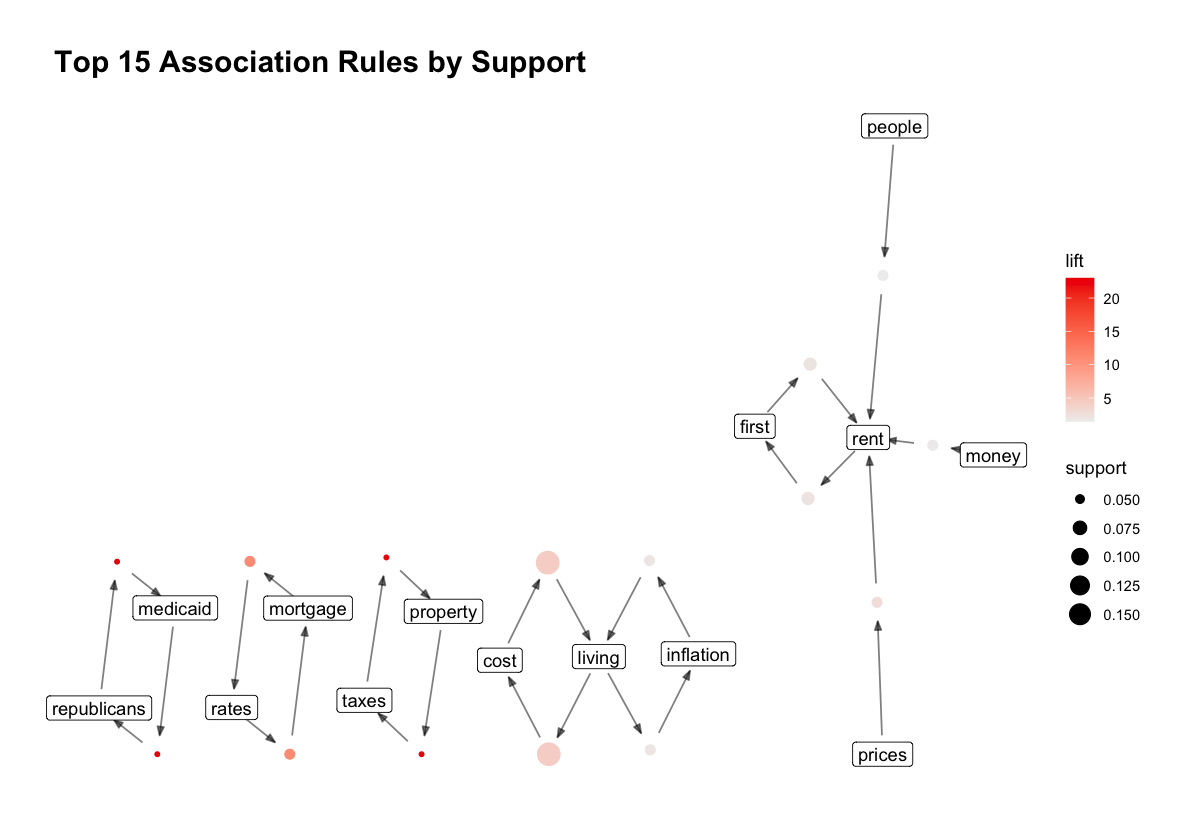

In [13]:
options(repr.plot.width = 10, repr.plot.height = 7)
plot(
    sort(assoc_rules, by = 'support', decreasing = TRUE) %>% head(15),
    method = 'graph',
    control = list(
        edges = ggraph::geom_edge_link(
            end_cap = circle(4, 'mm'),
            start_cap = circle(4, 'mm'),
            color = 'black',
            arrow = arrow(length = unit(2, 'mm'), angle = 20, type = 'closed'),
            alpha = 0.5
        ),
        nodetext = ggraph::geom_node_label(aes(label = label), repel = FALSE)
    )
) + ggtitle('Top 15 Association Rules by Support')